In [1]:
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
fm=tf.keras.datasets.fashion_mnist.load_data()
(x_train,y_train),(x_test,y_test)=fm
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

In [4]:
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

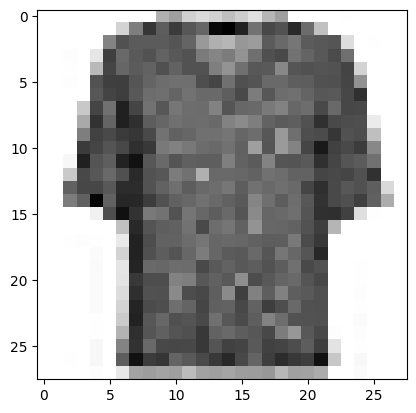

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x_train[200],cmap='binary')
pl.show()

In [7]:
codings_size=30
gen=tf.keras.Sequential()
gen.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'))
gen.add(tf.keras.layers.Dense(150,activation='relu',kernel_initializer='he_normal'))
gen.add(tf.keras.layers.Dense(x_train.shape[1]*x_train.shape[2],activation='sigmoid'))
gen.add(tf.keras.layers.Reshape(x_train.shape[1:]))

In [8]:
gen.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
disc=tf.keras.Sequential()
disc.add(tf.keras.layers.Flatten())
disc.add(tf.keras.layers.Dense(150,activation='relu',kernel_initializer='he_normal'))
disc.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'))
disc.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [11]:
disc.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
gan=tf.keras.Sequential([gen,disc])

In [13]:
gan.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
disc.compile(loss='binary_crossentropy',optimizer='rmsprop')
disc.trainable=False
gan.compile(loss='binary_crossentropy',optimizer='rmsprop')

# Custom Training Loop

In [26]:
batch_size=32
data=tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size=1000)
data=data.batch(batch_size,drop_remainder=True).prefetch(1)

In [27]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")  # extra code
        for X_batch in dataset:
            X_batch = tf.cast(X_batch, tf.float32)
            
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.train_on_batch(X_fake_and_real, y1)
            
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            gan.train_on_batch(noise, y2)


In [ ]:
train_gan(gan,data,batch_size,codings_size,n_epochs=50)


Epoch 1/50
Epoch 2/50
